# EE 399 SPRING QUATER 2023
# Instructor: J. Nathan Kutz
# HOMEWORK #5:
# DUE: Midnight on 5/15 (Extra credit if turned in by 5/12)

C:\Users\Linha\.android\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


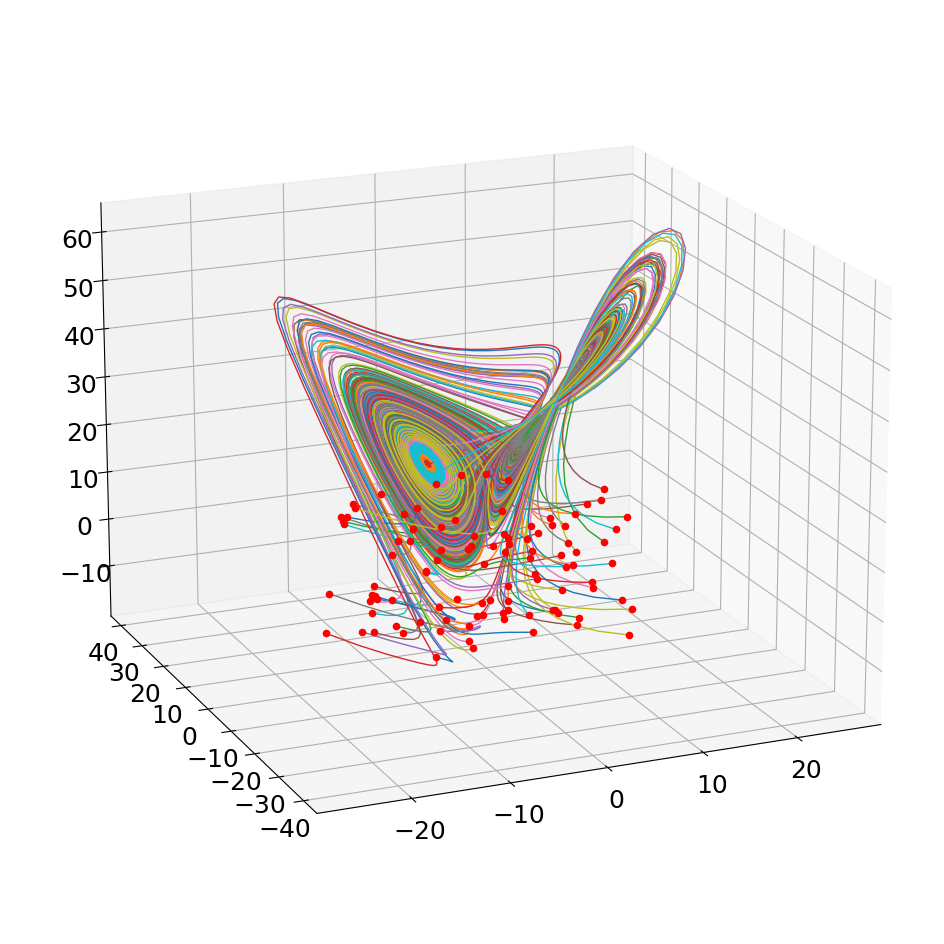

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        x = logsig(self.fc1(x))
        x = radbas(self.fc2(x))
        x = purelin(self.fc3(x))
        return x

# Create model instance
model = MyModel()



# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Define input and output data
nn_input = np.random.rand(100, 3)  # 100 samples, each with 3 features
nn_output = np.random.randint(0, 3, 100)  # 100 samples, each with a class label 0, 1, or 2


# Convert numpy arrays to PyTorch tensors
nn_input = torch.from_numpy(nn_input).float()
nn_output = torch.from_numpy(nn_output).long()

# Train the model
for epoch in range(30):
    optimizer.zero_grad()
    outputs = model(nn_input)
    loss = criterion(outputs, nn_output)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, loss={loss.item():.4f}")


Epoch 1, loss=1.1823
Epoch 2, loss=1.1769
Epoch 3, loss=1.1672
Epoch 4, loss=1.1549
Epoch 5, loss=1.1414
Epoch 6, loss=1.1284
Epoch 7, loss=1.1168
Epoch 8, loss=1.1075
Epoch 9, loss=1.1008
Epoch 10, loss=1.0967
Epoch 11, loss=1.0949
Epoch 12, loss=1.0948
Epoch 13, loss=1.0961
Epoch 14, loss=1.0982
Epoch 15, loss=1.1005
Epoch 16, loss=1.1027
Epoch 17, loss=1.1045
Epoch 18, loss=1.1058
Epoch 19, loss=1.1064
Epoch 20, loss=1.1064
Epoch 21, loss=1.1057
Epoch 22, loss=1.1046
Epoch 23, loss=1.1032
Epoch 24, loss=1.1017
Epoch 25, loss=1.1000
Epoch 26, loss=1.0985
Epoch 27, loss=1.0972
Epoch 28, loss=1.0961
Epoch 29, loss=1.0953
Epoch 30, loss=1.0948


In [3]:
outputs.shape
nn_output.shape

torch.Size([100])

### For the Lorenz equations (code given out previously in class emails), consider the following.
### 1. Train a NN to advance the solution from t to t + ∆t for ρ = 10, 28 and 40. Now see how well your NN works for future state prediction for ρ = 17 and ρ = 35

In [6]:
# Define your model, criterion, and optimizer
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define rho values for training and testing
train_rho_values = [10, 28, 40]
test_rho_values = [17, 35]

def generate_lorenz_data(rho):
    dt = 0.01
    T = 8
    t = np.arange(0, T+dt, dt)
    beta = 8/3
    sigma = 10

    nn_input = np.zeros((100*(len(t)-1), 3))
    nn_output = np.zeros_like(nn_input)

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                    for x0_j in x0])

    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    
    return nn_input, nn_output


# Define your model, criterion, and optimizer
model = MyModel()  # replace with a more complex model if necessary
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)  # add weight decay for regularization

# Train the model for each rho value
for rho in train_rho_values:
    print(f"\nTraining for rho = {rho}...")

    # Generate training data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Normalize data
    mean = nn_input.mean(dim=0)
    std = nn_input.std(dim=0)
    nn_input = (nn_input - mean) / std

    # Train the model
    for epoch in range(30):  # adjust the number of epochs if necessary
        optimizer.zero_grad()
        outputs = model(nn_input)
        loss = criterion(outputs, nn_output)
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:  # print every 10 epochs
            print(f"Epoch {epoch+1}, loss={loss.item():.4f}")

# Test the model for each test rho value
for rho in test_rho_values:
    print(f"\nTesting for rho = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Normalize data
    mean = nn_input.mean(dim=0)
    std = nn_input.std(dim=0)
    nn_input = (nn_input - mean) / std

    # Test the model
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        outputs = model(nn_input)
        loss = criterion(outputs, nn_output)
        print(f"Test loss={loss.item():.4f}")



Training for rho = 10...
Epoch 10, loss=26.1604
Epoch 20, loss=20.5746
Epoch 30, loss=19.1093

Training for rho = 28...
Epoch 10, loss=100.0067
Epoch 20, loss=77.9959
Epoch 30, loss=72.0748

Training for rho = 40...
Epoch 10, loss=134.5715
Epoch 20, loss=117.9760
Epoch 30, loss=104.6050

Testing for rho = 17...
Test loss=132.0147

Testing for rho = 35...
Test loss=80.5698


### 2. Compare feed-forward, LSTM, RNN and Echo State Networks for forecasting the dynamics.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=3, hidden_size=10, num_layers=1, batch_first=True)
        self.fc = nn.Linear(10, 3)
        
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        output = self.fc(h_n[-1])  # Use the last hidden state
        return output

# Create LSTM model instance
lstm_model = LSTMModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(lstm_model.parameters(), lr=0.01)

# Define rho values for comparison
comparison_rho_values = [20, 30]

# Compare the LSTM model's output for each comparison rho value
for rho in comparison_rho_values:
    print(f"\nComparing LSTM for rho = {rho}...")

    # Generate comparison data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Use the LSTM model for prediction
    lstm_model.eval()  # set the LSTM model to evaluation mode
    with torch.no_grad():
        predicted_output = lstm_model(nn_input)
        test_loss = criterion(predicted_output, nn_output)

    # Print the loss and test loss
    print("Loss:", test_loss.item())

    # Convert tensors to numpy arrays for comparison
    predicted_output = predicted_output.numpy()
    ground_truth = nn_output.numpy()

    # Print and compare the output
    for epoch in range(30):
        optimizer.zero_grad()
        outputs = lstm_model(nn_input)
        loss = criterion(outputs, nn_output)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:  # print every 10 epochs
            print(f"Epoch {epoch+1}, loss={loss.item():.4f}")




Comparing LSTM for rho = 20...


C:\Users\Linha\.android\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([80000, 3])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 153.04910278320312
Epoch 10, loss=93.9945
Epoch 20, loss=63.5272
Epoch 30, loss=51.8104

Comparing LSTM for rho = 30...
Loss: 183.3090362548828
Epoch 10, loss=112.0668
Epoch 20, loss=93.8641
Epoch 30, loss=85.9985


In [8]:
# Test the model for each test rho value
for rho in test_rho_values:
    print(f"\nTesting for rho = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Normalize data
    mean = nn_input.mean(dim=0)
    std = nn_input.std(dim=0)
    nn_input = (nn_input - mean) / std

    # Test the model
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        outputs = model(nn_input)
        loss = criterion(outputs, nn_output)
        print(f"Test loss={loss.item():.4f}")

        # Print epoch and loss values for comparison
        for epoch in range(30):
            optimizer.zero_grad()
            outputs = model(nn_input)
            loss = criterion(outputs, nn_output)
            if (epoch+1) % 10 == 0:  # print every 10 epochs
                print(f"Epoch {epoch+1}, loss={loss.item():.4f}")



Testing for rho = 17...
Test loss=132.0147
Epoch 10, loss=132.0147
Epoch 20, loss=132.0147
Epoch 30, loss=132.0147

Testing for rho = 35...
Test loss=80.5698
Epoch 10, loss=80.5698
Epoch 20, loss=80.5698
Epoch 30, loss=80.5698


In [10]:
class MyLSTMModel(nn.Module):
    def __init__(self):
        super(MyLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=3, hidden_size=10, num_layers=1, batch_first=True)
        self.fc = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.fc(h_n[-1])  # Take the last time step's hidden state
        return x

# Create LSTM model instance
lstm_model = MyLSTMModel()

# Define the LSTM-based model, criterion, and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(lstm_model.parameters(), lr=0.01)

# Test the LSTM model for each test rho value
for rho in test_rho_values:
    print(f"\nTesting for rho = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Normalize data
    mean = nn_input.mean(dim=0)
    std = nn_input.std(dim=0)
    nn_input = (nn_input - mean) / std

    # Test the LSTM model
    lstm_model.eval()  # set the LSTM model to evaluation mode
    with torch.no_grad():
        outputs = lstm_model(nn_input)
        loss = criterion(outputs, nn_output)
        print(f"Test loss={loss.item():.4f}")

        # Print epoch and loss values for comparison
        for epoch in range(30):
            optimizer.zero_grad()
            outputs = lstm_model(nn_input)
            loss = criterion(outputs, nn_output)
            if (epoch+1) % 10 == 0:  # print every 10 epochs
                print(f"Epoch {epoch+1}, loss={loss.item():.4f}")



Testing for rho = 17...
Test loss=113.2382
Epoch 10, loss=113.2382
Epoch 20, loss=113.2382
Epoch 30, loss=113.2382

Testing for rho = 35...
Test loss=428.3750
Epoch 10, loss=428.3750
Epoch 20, loss=428.3750
Epoch 30, loss=428.3750


In [11]:
# Define the RNN-based model
class MyRNNModel(nn.Module):
    def __init__(self):
        super(MyRNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=3, hidden_size=10, num_layers=1, batch_first=True)
        self.fc = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        _, h_n = self.rnn(x)
        x = self.fc(h_n[-1])  # Take the last time step's hidden state
        return x

# Create RNN model instance
rnn_model = MyRNNModel()

# Define the RNN-based model, criterion, and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

# Test the RNN model for each test rho value
for rho in test_rho_values:
    print(f"\nTesting for rho = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)  # replace with your function
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Normalize data
    mean = nn_input.mean(dim=0)
    std = nn_input.std(dim=0)
    nn_input = (nn_input - mean) / std

    # Test the RNN model
    rnn_model.eval()  # set the RNN model to evaluation mode
    with torch.no_grad():
        outputs = rnn_model(nn_input)
        loss = criterion(outputs, nn_output)
        print(f"Test loss={loss.item():.4f}")

        # Print epoch and loss values for comparison
        for epoch in range(30):
            optimizer.zero_grad()
            outputs = rnn_model(nn_input)
            loss = criterion(outputs, nn_output)
            if (epoch+1) % 10 == 0:  # print every 10 epochs
                print(f"Epoch {epoch+1}, loss={loss.item():.4f}")



Testing for rho = 17...
Test loss=111.8452
Epoch 10, loss=111.8452
Epoch 20, loss=111.8452
Epoch 30, loss=111.8452

Testing for rho = 35...
Test loss=431.5279
Epoch 10, loss=431.5279
Epoch 20, loss=431.5279
Epoch 30, loss=431.5279


In [12]:
import numpy as np
from scipy import integrate

# Define ρ values for testing
test_rho_values = [17, 35]

# Define the ESN-based model
class MyESNModel:
    def __init__(self, n_reservoir=100, spectral_radius=0.9, noise=0.01):
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.noise = noise

    def train(self, rho):
        # Generate training data
        nn_input, nn_output = generate_lorenz_data(rho)

        # Create and train the ESN
        esn = ESN(n_reservoir=self.n_reservoir, spectral_radius=self.spectral_radius, noise=self.noise)
        esn.fit(nn_input, nn_output)

        return esn

# Function to generate ESN input and output data
def generate_lorenz_data(rho):
    dt = 0.01
    T = 8
    t = np.arange(0, T+dt, dt)
    beta = 8/3
    sigma = 10

    nn_input = np.zeros((100*(len(t)-1), 3))
    nn_output = np.zeros_like(nn_input)

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                      for x0_j in x0])

    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, :-1, :]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, 1:, :]

    return nn_input, nn_output

# Echo State Network implementation
class ESN:
    def __init__(self, n_reservoir=100, spectral_radius=0.9, noise=0.01):
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.noise = noise

    def fit(self, input_data, output_data):
        # Reservoir initialization
        np.random.seed(42)
        self.W_in = np.random.rand(self.n_reservoir, input_data.shape[1]) - 0.5
        self.W = np.random.rand(self.n_reservoir, self.n_reservoir) - 0.5
        self.W *= self.spectral_radius / np.max(np.abs(np.linalg.eigvals(self.W)))
        self.X = np.zeros((input_data.shape[0], self.n_reservoir))

        # Training
        for t in range(1, input_data.shape[0]):
            self.X[t] = np.tanh(np.dot(input_data[t], self.W_in.T) + np.dot(self.X[t - 1], self.W))

        # Linear regression
        self.W_out = np.dot(np.linalg.pinv(self.X), output_data)


    def predict(self, input_data):
        predictions = np.zeros((input_data.shape[0], self.W_out.shape[1]))
        x = np.copy(self.X[-1])
        for t in range(input_data.shape[0]):
            x = np.tanh(np.dot(input_data[t], self.W_in.T) + np.dot(x, self.W))
            predictions[t] = np.dot(x, self.W_out)
        return predictions

# Create the ESN-based model instance
esn_model = MyESNModel(n_reservoir=100, spectral_radius=0.9, noise=0.01)

# Test the ESN model for each test ρ value
for rho in test_rho_values:
    print(f"\nTesting for ρ = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)

    # Train the ESN
    esn = esn_model.train(rho)

    # Predict using the trained ESN
    predicted_output = esn.predict(nn_input)

    # Compute and print the loss
    loss = np.mean((predicted_output - nn_output) ** 2)
    print(f"Test loss = {loss:.4f}")

       




Testing for ρ = 17...
Test loss = 0.2574

Testing for ρ = 35...
Test loss = 2.5307
